# Prédiction des mêmes chansons

Import des librairies utiles

In [1]:
import pandas as pd
import psycopg2
import util
import numpy as np
import matplotlib.pyplot as plt

# Connexion à la base de données locale
conn = psycopg2.connect(host="localhost",
                        database="NOPLP",
                        user="postgres",
                        password="Objectifcentrale2019!")
cur = conn.cursor()

In [2]:
dateSimule = input("Entrer la date au format 'yyyy-MM-dd' : ")

Chargement des données dans un dataframe

In [3]:
df = pd.read_sql_query('SELECT titre, artiste, "année",	nb_mots, "clusterID", (SELECT AVG(laps) FROM public."LapsMCDP"(titre,' + dateSimule + ')) AS MCDPmoy, (SELECT laps FROM public."LapsMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCDP, (SELECT AVG(laps) FROM public."LapsMCMCDP"(titre,' + dateSimule + ')) AS MCMCDPmoy, (SELECT laps FROM public."LapsMCMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCMCDP, public."DeltaDate"(titre, ' + dateSimule + ',(' + dateSimule + '::date - INTERVAL\'30 day\')::date), public."DeltaDateMC"(titre, ' + dateSimule + ',(' + dateSimule + '::date - INTERVAL\'30 day\')::date) FROM public."MêmesChansons"',con=conn)
df

,titre,artiste,année,nb_mots,clusterID,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC
0,Vous permettez Monsieur,Adamo Salvatore,1964.0,NaN,4,59.000000,59.0,NaN,NaN,152.0,93.0
1,Tout oublier,Angèle,2018.0,NaN,2,91.000000,91.0,NaN,NaN,134.0,43.0
2,Désormais,Aznavour Charles,1969.0,NaN,0,92.000000,142.0,631.0,631.0,151.0,640.0
3,Emmenez-moi,Aznavour Charles,1968.0,NaN,2,NaN,NaN,NaN,NaN,46.0,NaN
4,La bohème,Aznavour Charles,1965.0,NaN,3,132.333333,61.0,175.0,151.0,103.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
530,Laissez-nous chanter,Gold,1987.0,NaN,0,60.000000,60.0,NaN,NaN,70.0,NaN
531,Comme toi,Goldman Jean-Jacques,1983.0,NaN,1,148.000000,148.0,NaN,NaN,350.0,634.0
532,La fête (Michel Fugain et le Big Bazar),Fugain Michel et le Big Bazar,1973.0,230.0,2,43.000000,29.0,334.0,334.0,40.0,170.0
533,On ira (Jean-Jacques Goldman),Goldman Jean-Jacques,1997.0,NaN,4,59.000000,59.0,731.0,731.0,85.0,757.0


Histogramme des écarts même chanson dernier passage moyens

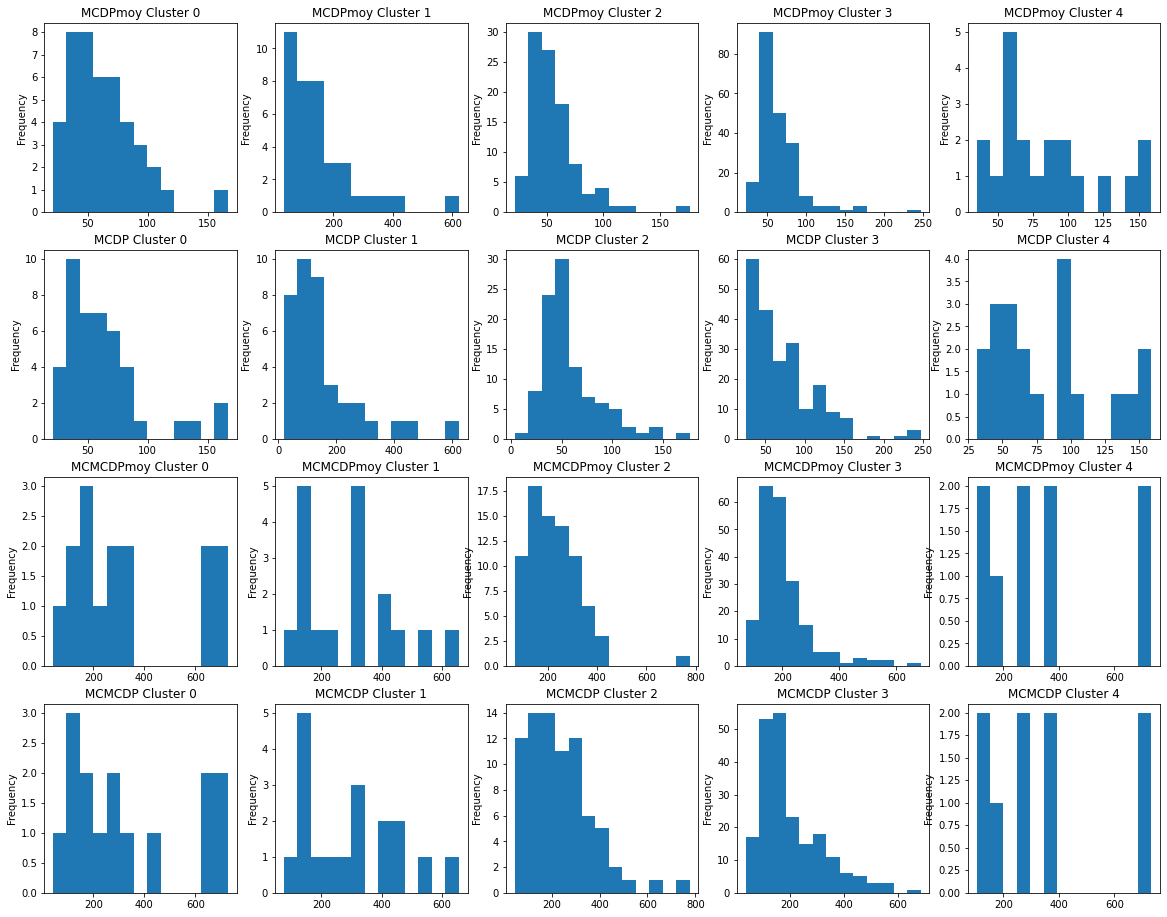

In [4]:
plt.figure(1, figsize=(20,16))
bins1 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,i+1)
    df[df['clusterID'] == i]['mcdpmoy'].plot.hist(bins=bins1[i])
    plt.title("MCDPmoy Cluster {}".format(i))
bins2 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,5+i+1)
    df[df['clusterID'] == i]['mcdp'].plot.hist(bins=bins2[i])
    plt.title("MCDP Cluster {}".format(i))
bins3 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,10+i+1)
    df[df['clusterID'] == i]['mcmcdpmoy'].plot.hist(bins=bins3[i])
    plt.title("MCMCDPmoy Cluster {}".format(i))
bins4 = [13,13,13,13,13]
for i in range(0,5):
    plt.subplot(4,5,15+i+1)
    df[df['clusterID'] == i]['mcmcdp'].plot.hist(bins=bins4[i])
    plt.title("MCMCDP Cluster {}".format(i))

Calcul des coefficients

In [5]:
histoMCDPmoy = util.histo(df, bins1, 'mcdpmoy')
valeursHistoMCDPmoy = [util.getHistoValues(h) for h in histoMCDPmoy]
histoMCDP = util.histo(df, bins2, 'mcdp')
valeursHistoMCDP = [util.getHistoValues(h) for h in histoMCDP]
histoMCMCDPmoy = util.histo(df, bins3, 'mcmcdpmoy')
valeursHistoMCMCDPmoy = [util.getHistoValues(h) for h in histoMCMCDPmoy]
histoMCMCDP = util.histo(df, bins4, 'mcmcdp')
valeursHistoMCMCDP = [util.getHistoValues(h) for h in histoMCMCDP]

Calcul des scores

In [6]:
df = util.scoreHisto(df, valeursHistoMCDPmoy, 'DeltaDate', 'f')
df = util.scoreHisto(df, valeursHistoMCDP, 'DeltaDate', 'g')
df = util.scoreHisto(df, valeursHistoMCMCDPmoy, 'DeltaDateMC', 'h')
df = util.scoreHisto(df, valeursHistoMCMCDP, 'DeltaDateMC', 'i')
df[['titre', 'artiste', 'clusterID', 'DeltaDate', 'DeltaDateMC', 'f', 'g', 'h', 'i']].sample(10)

,titre,artiste,clusterID,DeltaDate,DeltaDateMC,f,g,h,i
9,L'avventura,Stone et Charden,1,168.0,149.0,0.210526,0.078947,0.277778,0.277778
16,"Dis, quand reviendras-tu ?",Barbara,4,44.0,668.0,0.250000,0.150000,0.000000,0.000000
192,Bambino,Dalida,2,33.0,1000.0,1.222222,0.242424,0.000000,0.000000
154,L'aigle noir,Barbara,3,96.0,193.0,0.038095,0.047619,0.295238,0.114286
52,"Elle, tu l'aimes",Ségara Hélène,3,31.0,82.0,0.071429,0.285714,0.080952,0.090476
43,Chanter,Pagny Florent,3,199.0,74.0,0.000000,0.000000,0.080952,0.090476
30,Tata Yoyo,Cordy Annie,3,124.0,63.0,0.014286,0.085714,NaN,0.090476
58,Donne-moi le temps,Jenifer,3,312.0,86.0,0.000000,0.000000,0.080952,0.257143
199,Et tu danses avec lui,C. Jérôme,3,148.0,369.0,0.004762,0.033333,0.023810,0.052381
210,L'envie,Hallyday Johnny,2,173.0,1000.0,0.010101,0.010101,0.000000,0.000000


In [7]:
df['score'] = df['f']*df['g']*df['h']*df['i']*10000
df

,titre,artiste,année,nb_mots,clusterID,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i,score
0,Je l'aime à mourir,Cabrel Francis,1979.0,NaN,0,64.0,64.0,NaN,NaN,96.0,32.0,0.069767,0.023256,NaN,NaN,NaN
1,Beau malheur,Moire Emmanuel,2013.0,NaN,0,55.0,71.0,727.0,727.0,121.0,50.0,0.023256,0.000000,2.066667,2.066667,0.000000
2,Padam padam,Piaf Édith,1951.0,NaN,0,55.0,55.0,680.0,680.0,135.0,80.0,0.000000,0.023256,2.066667,2.066667,0.000000
3,Un homme heureux,Sheller William,1991.0,NaN,0,103.0,48.0,192.0,192.0,144.0,96.0,0.000000,0.023256,0.133333,0.200000,0.000000
4,L'oiseau et l'enfant,Myriam Marie,1977.0,NaN,0,82.0,82.0,NaN,NaN,33.0,98.0,0.186047,0.232558,0.133333,0.200000,11.537768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Je veux tes yeux,Angèle,2018.0,173.0,4,92.5,108.0,733.0,733.0,126.0,751.0,0.050000,0.000000,0.000000,0.000000,0.000000
19,On ira (Jean-Jacques Goldman),Goldman Jean-Jacques,1997.0,NaN,4,59.0,59.0,731.0,731.0,85.0,757.0,0.100000,0.000000,0.000000,0.000000,0.000000
20,Je te promets (Johnny Hallyday),Hallyday Johnny,1986.0,NaN,4,NaN,NaN,NaN,NaN,205.0,779.0,0.000000,0.000000,0.000000,0.000000,0.000000
21,L'amour c'est comme une cigarette,Vartan Sylvie,1981.0,NaN,4,NaN,NaN,NaN,NaN,39.0,786.0,0.250000,0.250000,0.000000,0.000000,0.000000


In [8]:
df = df.sort_values(by='score', ascending=False)
df.to_csv('test.csv', sep=";", encoding='utf8')
# np.where(df['titre'] == 'Ça fait mal')[0][0]
